<a href="https://colab.research.google.com/github/marcospfduarte/Trabalho_final/blob/main/Trabalho_Final_Ci%C3%AAncias_de_Dados_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final para Ciências de Dados - Verão 2022 - PUC-RIO
#### Nome : Marcos Paulo Ferreira Duarte
###### Professor : Ricardo Dahis 

O trabalho abaixo tem como objetivo realizar uma análise descritiva dos dados de educação com base no Índice de Desenvolvimento da Educação Básica - IDEB. O IDEB é uma das principais métricas de qualidade de ensino no Brasil. O relatório é baseado nos resultados do Sistema Nacional de Avaliação da Educação Básica - SAEB - e da taxa de aprovação realizada no sistema. As avalições são coordenadas pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (INEP), vinculado ao Ministério da Educação.

Para realizar esse empreendimento, utiliza-se bases auxiliares, como a projeção populacional disponibilizada pelo DATASUS, base de dados do Sistema Único de Saúde, dados de PIB disponibilizados pelo Instituto Brasileiro de Geografia e Estatística - IBGE -, as avaliações de indicadores sociais dos alunos, pelo INSE, também de responsabilidade do INEP, e, por fim, dados referentes às finanças públicas dos entes federativos através do FINBRA, disponível pelo Tesouro Nacional.


Dessa forma, busca-se com essas estatísticas realizar uma descrição de como a educação se encontra a partir do ano de 2013 até 2019, último dado do IDEB. Essas estatísticas podem ser utilizadas futuramente por outros pesquisadores para desenvolver novas hipóteses, também para agentes do setor público e do terceiro setor para balizar reflexões sobre políticas públicas.

### Descrição dos Bancos de Dados 



1.   **IDEB**



2.   **INSE**





3.   **FINBRA**




4.   **PIB**




5.   **Projeção Populacional - DATASUS**










In [ ]:
# baixando o pacote da Base dos Dados (BD)
!pip install basedosdados

In [1]:
from google.colab import drive ## pacote para utilizar o drive
import os
import pandas as pd ## pacote para tratamento de dataframes
import numpy as np 
drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/Trabalho - CD' ## path para captar os arquivos disponíveis no drive

Mounted at /content/gdrive


In [2]:
os.getcwdb()
os.chdir(root_path) #estabelecendo a conexão com a pasta no drive
os.listdir() #lista de arquivos na pasta referente ao trabalho

['receita_tratada',
 'despesas.csv',
 'receita_tratada.csv',
 'despesa_filtrada.csv',
 'inse_2019.xlsx',
 'verificacao_populacao.xlsx',
 'agrupado.xlsx',
 '2013_receita.csv',
 '2015_receita.csv',
 '2013_despesa.csv',
 '2015_despesa.csv',
 '2019_receita.csv',
 '2017_despesa.csv',
 '2017_receita.csv',
 'receita.csv',
 '2019_despesa.csv',
 '2013_despesa_i.csv',
 '2015_despesa_i.csv',
 '2017_despesa_i.csv',
 '2019_despesa_i.csv']

Estratégia inicial : Realizar o tratamento de dados nos bancos de finanças públicas, dispinibilizados no FINBRA, para entes municipais e estaduais. Dessa forma, buscará consolidar os dados referentes a Receitas Correntes e Receitas vinculadas à transferências. Este último será um exercício para identificar se entes federativos com baixa capacidade de receita "própria" apresentam alguma variação perceptível através de estatísticas descritivas. Além disso, será utilizado neste trabalho os dados de despesas empenhadas vinculados diretamente à educação. 

In [ ]:
### BAIXANDO OS DADOS VIA BASE DOS DADOS (BD)
import basedosdados as bd
# Para carregar o dado direto no pandas
#receita = bd.read_table(dataset_id='br_me_siconfi', 
#table_id='municipio_receitas_orcamentarias',
#      billing_project_id="ra-amazon") # gerando um dataframe direto com os dados no repostiório do BD
# o código acima baixa os dados de receita orçamentária dos municípios



Ao usar o banco do BD, verifiquei que existia algumas mudanças de nomes e de portarias de um ano para o outro. Para solucionar esse problema, utilizei a base direto do SICONFI - não API

In [ ]:
#receita = receita[receita.ano >2012] #filtrando para o ano desejado
#receita.to_csv("receita.csv")
lista_anos = [2013,2015,2017,2019]
#receita = receita[(receita.estagio == "Receitas Brutas Realizadas") | (receita.estagio == "Receitas Realizadas")]
#receita = receita[receita.ano.isin(lista_anos)]

In [ ]:
#receita[(receita.ano==2015)]

,ano,sigla_uf,id_municipio,estagio,portaria,conta,estagio_bd,id_conta_bd,conta_bd,valor
10410,2015,PB,2505600,Receitas Brutas Realizadas,1.1.1.0.00.00.00,Impostos,Receitas Brutas Realizadas,1.1.1.1.0.00.00.00,Impostos,267337.28
10411,2015,PB,2505600,Receitas Brutas Realizadas,1.7.2.1.34.00.00,Transferências de Recursos do Fundo Nacional d...,Receitas Brutas Realizadas,NaN,Transferências de Recursos do Fundo Nacional d...,200248.34
10412,2015,PB,2505600,Receitas Brutas Realizadas,1.9.1.3.11.00.00,Multas e Juros de Mora da Dívida Ativa do Impo...,Receitas Brutas Realizadas,NaN,Multas e Juros de Mora da Dívida Ativa do Impo...,677.97
10413,2015,PB,2505600,Receitas Brutas Realizadas,1.9.2.2.00.00.00,Restituições,Receitas Brutas Realizadas,NaN,Restituições,12585.20
10414,2015,PB,2505600,Receitas Brutas Realizadas,2.4.2.0.00.00.00,Transferências Intergovernamentais,Receitas Brutas Realizadas,NaN,Transferências Intergovernamentais,387164.90
...,...,...,...,...,...,...,...,...,...,...
16594214,2015,MG,3105707,Receitas Brutas Realizadas,1.7.2.2.01.00.00,Participação na Receita dos Estados,Receitas Brutas Realizadas,NaN,Participação na Receita dos Estados,2138522.15
16594215,2015,MG,3105707,Receitas Brutas Realizadas,1.7.2.2.01.13.00,Cota-Parte da Contribuição de Intervenção no D...,Receitas Brutas Realizadas,NaN,Cota-Parte da Contribuição de Intervenção no D...,5559.37
16594216,2015,MG,3105707,Receitas Brutas Realizadas,1.7.2.4.00.00.00,Transferências Multigovernamentais,Receitas Brutas Realizadas,NaN,Transferências Multigovernamentais,876933.24
16594217,2015,MG,3105707,Receitas Brutas Realizadas,1.7.6.1.00.00.00,Transferências de Convênios da União e de Suas...,Receitas Brutas Realizadas,NaN,Transferências de Convênios da União e de Suas...,98742.75


Há algumas imprecisões encontradas na base disponível pela Base dos Dados. Por conta disso, será feito um tratamento por ano através dos dados disponíveis pelo site da Secretaria do Tesouro Nacional. Os problemas estão mais relacionados nomes do estágio de receita e da portaria, mas há outras pequenas imprecisões

receitas 2013, 2015, 2017 e 2019

In [ ]:
receita_2013 = pd.read_csv('2013_receita.csv',  encoding='latin-1', sep = ';', decimal=',', header= 3)
receita_2015 = pd.read_csv('2015_receita.csv', encoding='latin-1', sep = ';', decimal=',', header= 3)
receita_2017 = pd.read_csv('2017_receita.csv', encoding='latin-1', sep = ';', decimal=',', header= 3)
receita_2019 = pd.read_csv('2019_receita.csv', encoding='latin-1', sep = ';', decimal=',', header= 3)

In [ ]:
def indexador (banco):#quebrando a coluna em 2 partes para que consiga identifcar a conta apenas pelo número de referência
  a = banco['Conta'].apply(lambda x : pd.Series(x.split(' '))) 
  banco = pd.merge(banco, a[0], left_index= True, right_index= True)
  banco = banco.rename(columns = {0 : 'indexador_conta'})
  return(banco)


In [ ]:
receita_2013 = indexador(receita_2013) ## separando para ter o número do indexador
receita_2015 = indexador(receita_2015)
receita_2017 = indexador(receita_2017)
receita_2019 = indexador(receita_2019)

In [ ]:
def funcao_receita(banco,ano): #para 2013, 2015, 2017
  lista_index = ["1.0.0.0.00.00.00","1.7.0.0.00.00.00"]
  dic_index = {"1.0.0.0.00.00.00" : "rbc_corrente", #receitas brutas - receitas correntes
              "1.7.0.0.00.00.00" : "rbc_transf"} # receitas provenientes de transferências
  lista_tipo = ["Receitas Realizadas", "Receitas Brutas Realizadas"] #há essas duas nomeclaturas com sentido parecido
  banco_base = banco[["Cod.IBGE","UF"]]
  banco_base['ano'] = ano
  banco_base = banco_base.drop_duplicates() # excluindo as duplicações
  for i in lista_index:
    a = banco[(banco["Coluna"].isin(lista_tipo)) & (banco["indexador_conta"] == i)] #filtrando pelas 2 partes interessadas 
    b = banco[["Cod.IBGE","UF"]]
    b = b.drop_duplicates()
    b["tipo"] = 0
    for j in range(b.shape[0]):
      c = a[(a["Cod.IBGE"] == b.iloc[j,0])]
      if c.shape[0] != 0 :
        b.iloc[j,2] = c.iloc[0,7]
    b = b.rename(columns = {"tipo" : dic_index[i]})
    b = b[["Cod.IBGE", dic_index[i]]]
    banco_base = pd.merge(banco_base,b, on = ["Cod.IBGE"])
  return(banco_base)


def funcao_receita_2019(banco):  # o código abaixo do gasto muda no ano de 2019. Para isso, foi mais fácil fazer uma nova função
  lista_index = ["1.0.0.0.00.0.0","1.7.0.0.00.0.0"]
  dic_index = {"1.0.0.0.00.0.0" : "rbc_corrente", #receitas brutas - receitas correntes
              "1.7.0.0.00.0.0" : "rbc_transf"} # receitas provenientes de transferências
  lista_tipo = ["Receitas Realizadas", "Receitas Brutas Realizadas"]
  banco_base = banco[["Cod.IBGE","UF"]]
  banco_base['ano'] = 2019
  banco_base = banco_base.drop_duplicates() # excluindo as duplicações
  for i in lista_index:
    a = banco[(banco["Coluna"].isin(lista_tipo)) & (banco["indexador_conta"] == i)] #filtrando pelas 2 partes interessadas 
    b = banco[["Cod.IBGE","UF"]]
    b = b.drop_duplicates()
    b["tipo"] = 0
    for j in range(b.shape[0]):
      c = a[(a["Cod.IBGE"] == b.iloc[j,0])]
      if c.shape[0] != 0 :
        b.iloc[j,2] = c.iloc[0,7]
    b = b.rename(columns = {"tipo" : dic_index[i]})
    b = b[["Cod.IBGE", dic_index[i]]]
    banco_base = pd.merge(banco_base,b, on = ["Cod.IBGE"])
  return(banco_base)



In [ ]:
receita_2013 = funcao_receita(receita_2013,2013)
receita_2015 = funcao_receita(receita_2015,2015)
receita_2017 = funcao_receita(receita_2017,2017)
receita_2019 = funcao_receita_2019(receita_2019)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
receita = pd.concat([receita_2013, receita_2015,receita_2017,receita_2019], ignore_index=True)
receita

,Cod.IBGE,UF,ano,rbc_corrente,rbc_transf
0,4126652,PR,2013,1.338440e+07,1.243198e+07
1,4206652,SC,2013,1.664780e+07,1.564278e+07
2,4310405,RS,2013,1.724854e+07,1.505249e+07
3,4322533,RS,2013,2.455443e+07,2.045530e+07
4,4318705,RS,2013,5.337788e+08,3.033783e+08
...,...,...,...,...,...
22024,2500601,PB,2019,8.811362e+07,7.660368e+07
22025,1504406,PA,2019,6.223371e+07,5.755152e+07
22026,1200435,AC,2019,2.424228e+07,2.376082e+07
22027,1507102,PA,2019,4.275747e+07,4.137307e+07


In [ ]:
receita.to_csv("receita.csv")

Despesas

In [ ]:
despesa_2013 = pd.read_csv('2013_despesa.csv',  encoding='latin-1', sep = ';', decimal=',', header= 3)
despesa_2015 = pd.read_csv('2015_despesa.csv', encoding='latin-1', sep = ';', decimal=',', header= 3)
despesa_2017 = pd.read_csv('2017_despesa.csv', encoding='latin-1', sep = ';', decimal=',', header= 3)
despesa_2019 = pd.read_csv('2019_despesa.csv', encoding='latin-1', sep = ';', decimal=',', header= 3)

In [ ]:
despesa_2013 = indexador(despesa_2013)
despesa_2015 = indexador(despesa_2015)
despesa_2017 = indexador(despesa_2017)
despesa_2019 = indexador(despesa_2019)

In [ ]:
despesa_2013.to_csv("2013_despesa_i.csv")
despesa_2015.to_csv("2015_despesa_i.csv")
despesa_2017.to_csv("2017_despesa_i.csv")
despesa_2019.to_csv("2019_despesa_i.csv")

In [3]:
despesa_2013 = pd.read_csv("2013_despesa_i.csv", index_col = 0)
despesa_2015 = pd.read_csv("2015_despesa_i.csv", index_col = 0)
despesa_2017 = pd.read_csv("2017_despesa_i.csv", index_col = 0)
despesa_2019 = pd.read_csv("2019_despesa_i.csv", index_col = 0)


In [16]:

def funcao_despesa(banco,ano): 
  lista_index = ["12","12.361", "12.365"]
  dic_index = {"12" : "d_educacao", #despesa com educação
              "12.361" : "d_educacao_fund", # despesa com educação fundamental
              "12.365" : "d_educacao_inf" #depesa com educação infantil
  }       
  banco_base = banco[["Cod.IBGE","UF"]]
  banco_base['ano'] = ano
  banco_base = banco_base.drop_duplicates() # excluindo as duplicações
  for i in lista_index:
    a = banco[(banco["Coluna"] == "Despesas Empenhadas") & (banco["indexador_conta"] == i)] #filtrando pelas 2 partes interessadas 
    b = banco[["Cod.IBGE","UF"]]
    b = b.drop_duplicates()
    b["tipo"] = 0
    for j in range(b.shape[0]):
      c = a[(a["Cod.IBGE"] == b.iloc[j,0])]
      if c.shape[0] != 0 :
        b.iloc[j,2] = c.iloc[0,7]
    b = b.rename(columns = {"tipo" : dic_index[i]})
    b = b[["Cod.IBGE", dic_index[i]]]
    banco_base = pd.merge(banco_base,b, on = ["Cod.IBGE"])
  return(banco_base)



In [19]:
desp_2013 = funcao_despesa(despesa_2013,2013)
desp_2015 = funcao_despesa(despesa_2015,2015)
desp_2017 = funcao_despesa(despesa_2017,2017)
desp_2019 = funcao_despesa(despesa_2019,2019)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [38]:
despesa = pd.concat([desp_2013,desp_2015,desp_2017,desp_2019],ignore_index=True )
despesa = despesa.rename(columns={"Cod.IBGE":"id_municipio", "UF":"sigla_uf"})
receita = receita.rename(columns={"Cod.IBGE":"id_municipio", "UF":"sigla_uf"})

despesa

,id_municipio,sigla_uf,ano,d_educacao,d_educacao_fund,d_educacao_inf
0,4126652,PR,2013,2.736463e+06,2677755.31,58707.61
1,4206652,SC,2013,3.364018e+06,2790403.23,412590.71
2,4310405,RS,2013,3.485439e+06,1965225.82,958860.31
3,4322533,RS,2013,6.985692e+06,5459299.61,1187516.56
4,4318705,RS,2013,1.255479e+08,92666252.40,30167693.51
...,...,...,...,...,...,...
21970,2500601,PB,2019,2.116472e+07,19999537.50,318.40
21971,1504406,PA,2019,2.918976e+07,25258701.59,2317365.89
21972,1200435,AC,2019,1.114757e+07,9642444.63,1163025.49
21973,1507102,PA,2019,1.601000e+07,14641639.79,148812.30


Agregando Receita e despesa 

In [45]:
fiscal = pd.merge(receita,despesa, on = ['ano', 'id_municipio',"sigla_uf"])
fiscal

,id_municipio,sigla_uf,ano,rbc_corrente,rbc_transf,d_educacao,d_educacao_fund,d_educacao_inf
0,4126652,PR,2013,1.338440e+07,1.243198e+07,2.736463e+06,2677755.31,58707.61
1,4206652,SC,2013,1.664780e+07,1.564278e+07,3.364018e+06,2790403.23,412590.71
2,4310405,RS,2013,1.724854e+07,1.505249e+07,3.485439e+06,1965225.82,958860.31
3,4322533,RS,2013,2.455443e+07,2.045530e+07,6.985692e+06,5459299.61,1187516.56
4,4318705,RS,2013,5.337788e+08,3.033783e+08,1.255479e+08,92666252.40,30167693.51
...,...,...,...,...,...,...,...,...
21958,2500601,PB,2019,8.811362e+07,7.660368e+07,2.116472e+07,19999537.50,318.40
21959,1504406,PA,2019,6.223371e+07,5.755152e+07,2.918976e+07,25258701.59,2317365.89
21960,1200435,AC,2019,2.424228e+07,2.376082e+07,1.114757e+07,9642444.63,1163025.49
21961,1507102,PA,2019,4.275747e+07,4.137307e+07,1.601000e+07,14641639.79,148812.30


In [46]:
#fiscal.to_csv('fiscal.csv')

# Dados de IDEB 

Estratégia : tratar a base de IDEB produzida pelo INEP e disponível na Base dos Dados.

Como os serviços  de educação podem ter complementariedades entre estado e município. Apesar disso, utiliza-se a avaliação com base nas escolas da rede municipal, já que o trabalho trata de contas diretamente vinculadas aos municípios. Em alguns casos, onde há forte complementariedade, os gastos do estado também influenciam a infraestrutrua das escolas de ensinos de responsabilidade legal pela prefeitura. 

In [ ]:
ideb = bd.read_table(dataset_id='br_inep_ideb', 
table_id='municipio',
billing_project_id="ra-amazon")

Downloading: 100%|██████████| 294426/294426 [00:48<00:00, 6121.40rows/s]


In [ ]:
lista_anos = [2013,2015,2017,2019]
ideb_fundamental = ideb[(ideb.ano.isin(lista_anos)&(ideb.rede == "municipal"))] ## filtrando apenas os anos de interesse e também as redes públicas no geral
ideb_fundamental

,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
4431,2013,AL,2700508,municipal,fundamental,finais (6-9),55.3,0.551028,213.94,205.14,3.651500,2.0,2.9
4433,2013,AL,2700607,municipal,fundamental,finais (6-9),46.8,0.487950,214.91,212.13,3.784000,1.8,3.4
4435,2013,AL,2700805,municipal,fundamental,finais (6-9),59.4,0.600337,206.77,208.11,3.581500,2.2,3.1
4436,2013,AL,2701209,municipal,fundamental,finais (6-9),58.3,0.579466,216.71,213.69,3.840000,2.2,3.4
4437,2013,AL,2701308,municipal,fundamental,finais (6-9),48.0,0.482797,218.49,213.67,3.869500,1.9,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294417,2019,SP,3549201,municipal,fundamental,iniciais (1-5),94.3,0.930130,246.78,217.99,6.637240,6.2,7.6
294419,2019,SP,3549706,municipal,fundamental,iniciais (1-5),97.9,0.975202,234.27,216.55,6.372500,6.2,6.1
294420,2019,SP,3551108,municipal,fundamental,iniciais (1-5),98.4,0.984750,229.75,216.07,6.277331,6.2,6.6
294422,2019,SP,3551702,municipal,fundamental,finais (6-9),92.9,0.930569,305.85,296.39,6.704167,6.2,6.1


In [ ]:
def ideb_filtro(banco): #filtrando a base de ideb para separa os anos iniciais dos anos finais em colunas ara o mesmo município
  a = banco[["ano","id_municipio"]]
  lista = ["iniciais (1-5)" ,"finais (6-9)"]
  for i in lista: #caminhando pela lista acima
    b = banco[banco.anos_escolares == i] #filtrando pelo nível do ensino fundamental
    b = b[["ano","id_municipio", "taxa_aprovacao","indicador_rendimento",
           "nota_saeb_matematica","nota_saeb_lingua_portuguesa", "ideb"]]
    if i == "iniciais (1-5)": 
      b = b.add_suffix("_inicial")
      b = b.rename(columns = {"ano_inicial":"ano", "id_municipio_inicial": "id_municipio"})
    else:
      b = b.add_suffix("_final")
      b = b.rename(columns = {"ano_final":"ano", "id_municipio_final": "id_municipio"})
    a = pd.merge(a, b, on = ["ano", "id_municipio"])
  a = a.drop_duplicates() # retirando as duplicações 
  return(a)


In [ ]:
ideb = ideb_filtro(ideb_fundamental)

# Tratando os dados do INSE

Esses dados apresentam uma métrica que analisa a condição sócio-econômica dos estudantes brasileiros. O INSE está disponível para nível municipal apenas em 2019. Dicionário disponível abaixo

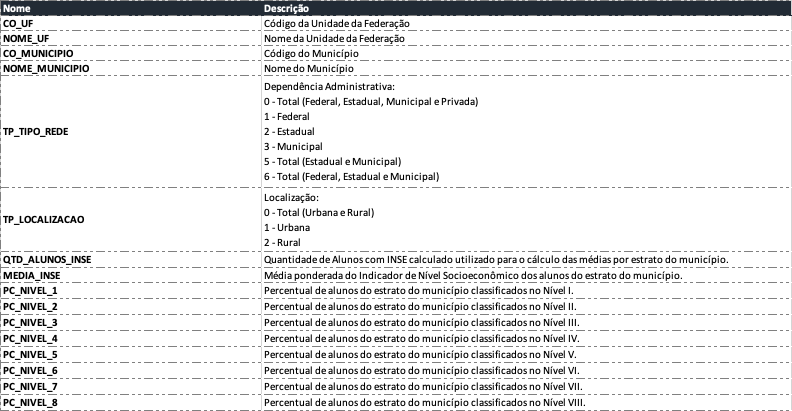

Observações : * Foi calculado o INSE apenas para os Municípios e estratos que atingiram o mínimo de 10 alunos e o percentual de participação de 50%


In [ ]:
inse = pd.read_excel("inse_2019.xlsx" , header = 2) # lendo o arquivo em excel
inse

,CO_UF,NOME_UF,CO_MUNICIPIO*,NOME_MUNICIPIO,TP_TIPO_REDE,TP_LOCALIZACAO,QTD_ALUNOS_INSE,MEDIA_INSE**,PC_NIVEL_1,PC_NIVEL_2,PC_NIVEL_3,PC_NIVEL_4,PC_NIVEL_5,PC_NIVEL_6,PC_NIVEL_7,PC_NIVEL_8
0,11,Rondônia,1100015,Alta Floresta D'Oeste,0,0,833,4.7512,0.13,15.55,25.97,23.22,19.81,9.07,5.76,0.49
1,11,Rondônia,1100015,Alta Floresta D'Oeste,0,1,773,4.7662,0.14,15.31,25.56,23.01,19.78,9.42,6.24,0.53
2,11,Rondônia,1100015,Alta Floresta D'Oeste,0,2,60,4.5703,0.00,18.47,30.89,25.82,20.06,4.75,0.00,0.00
3,11,Rondônia,1100015,Alta Floresta D'Oeste,2,0,668,4.7891,0.00,14.97,24.72,23.25,19.89,9.92,6.62,0.62
4,11,Rondônia,1100015,Alta Floresta D'Oeste,2,1,668,4.7891,0.00,14.97,24.72,23.25,19.89,9.92,6.62,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69901,53,Distrito Federal,5300108,Brasília,5,1,65371,5.2744,0.30,5.06,11.10,20.42,24.87,19.98,16.20,2.08
69902,53,Distrito Federal,5300108,Brasília,5,2,3581,5.0530,0.65,8.27,15.77,22.97,24.18,16.10,10.99,1.08
69903,53,Distrito Federal,5300108,Brasília,6,0,69508,5.2746,0.31,5.15,11.23,20.34,24.60,19.85,16.43,2.08
69904,53,Distrito Federal,5300108,Brasília,6,1,65883,5.2864,0.29,4.99,10.98,20.21,24.63,20.05,16.72,2.13


In [ ]:
inse_tratado = inse[(inse.TP_TIPO_REDE == 3 )&(inse.TP_LOCALIZACAO == 0)]
inse_tratado = inse_tratado.rename(columns={"CO_MUNICIPIO*": "id_municipio", "MEDIA_INSE**": "inse_2019"})
inse_tratado = inse_tratado[["id_municipio", "inse_2019"]]

In [ ]:
inse_tratado.id_municipio = inse_tratado.id_municipio.astype(int) ### por conta do erro ao juntar duas bases com indexadores em classes diferentes
ideb.id_municipio = ideb.id_municipio.astype(int)

In [ ]:
ideb = pd.merge(ideb, inse_tratado, on = "id_municipio")

Como o inse só está disponível para o ano de 2019 e o banco coloca valores para outros anos, será retirado esses valores

In [ ]:
for i in range(ideb.shape[0]):
  if ideb.iloc[i,0] != 2019:
    ideb.iloc[i,12] = np.nan

In [ ]:
ideb

,ano,id_municipio,taxa_aprovacao_inicial,indicador_rendimento_inicial,nota_saeb_matematica_inicial,nota_saeb_lingua_portuguesa_inicial,ideb_inicial,taxa_aprovacao_final,indicador_rendimento_final,nota_saeb_matematica_final,nota_saeb_lingua_portuguesa_final,ideb_final,inse_2019
0,2013,2700508,84.7,0.848107,147.02,141.58,2.8,55.3,0.551028,213.94,205.14,2.0,NaN
1,2015,2700508,87.2,0.870630,NaN,NaN,NaN,61.7,0.573378,NaN,NaN,NaN,NaN
2,2017,2700508,90.5,0.908671,183.57,171.83,4.2,59.7,0.603281,221.24,227.22,2.5,NaN
3,2019,2700508,96.8,0.969363,187.80,172.39,4.5,83.1,0.837561,232.11,225.69,3.6,4.1980
4,2013,2700607,81.0,0.811607,177.05,166.39,3.5,46.8,0.487950,214.91,212.13,1.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,2017,2304608,97.3,0.975991,215.16,204.55,5.7,88.4,0.884377,271.77,283.92,5.2,NaN
15388,2017,3500303,95.5,0.951028,231.52,223.96,6.1,84.0,0.848615,274.11,272.79,4.9,NaN
15389,2019,3500303,95.9,0.957875,234.83,218.71,6.2,92.7,0.931690,290.20,292.01,5.9,5.2287
15390,2013,3500303,88.6,0.882589,223.27,200.63,5.2,76.7,0.764392,270.26,257.26,4.2,NaN


# População estimada - DATASUS

A projeção populacional dos municípios brasileiros produzida pelo Ministério da Saúde. Dessa forma, será possível normalizar gastos públicos em nível per capita, o que ajuda possíveis análises em cross-sections

In [ ]:
populacao = bd.read_table(dataset_id='br_ms_populacao', 
table_id='municipio',
billing_project_id="ra-amazon")

Downloading: 100%|██████████| 3972288/3972288 [04:06<00:00, 16114.89rows/s]


In [ ]:
populacao = populacao[populacao.ano.isin(lista_anos)]
populacao

,ano,id_municipio,sexo,grupo_idade,populacao
88918,2013,1100015,feminino,80-mais,97
88919,2013,1100015,masculino,80-mais,122
88920,2013,1100023,feminino,80-mais,351
88921,2013,1100023,masculino,80-mais,384
88922,2013,1100031,feminino,80-mais,29
...,...,...,...,...,...
3938883,2015,5222203,masculino,75-79 anos,21
3938884,2015,5222302,feminino,75-79 anos,37
3938885,2015,5222302,masculino,75-79 anos,37
3938886,2015,5300108,feminino,75-79 anos,18019


Estratégias para tratamento : 

1.   agregar população estimada
2.   desagregar a população por faixa de idade para anos menores de 15 anos (idade predominante na atuação dos municípios para a prestação de serviços educacionais). 

Apesar da sobreposição de responsabilidade em relação ao ensino fundamental pela constituição brasileira, os municípios tem maior preponderância na organização da escolarização do ensino infantil, básico e fundamental. Como a divisão da projeção populacional está feita em grupos, não há como calibrar de forma satisfatória a transição do ensino fundamental ao ensino médio por idade, já que essa transição ocorre, nos casos em que não há atraso, por volta dos 14 e 15 anos. Dessa forma, a incorporação de um novo grupo (15-19 anos) pode gerar acréscimo significativo da população. Por contas das diferenças de estrutura demográficas entre municípios, esse acréscimo pode gerar distorções analíticas.



In [ ]:
def populacao_filtros(banco): #nova função para realizar o filtro de populacao
  lista_idade=['0-4 anos','5-9 anos', '10-14 anos']
  banco_base = banco[["ano", "id_municipio"]]  #criando um banco base para que agregre posteriormente os resultados abaixo
  banco_base = banco_base.drop_duplicates() 
  agregada = banco[["ano", "id_municipio", "populacao"]] # primeira parte
  agregada = agregada.groupby(['ano', 'id_municipio']).sum() #agregando e somando
  agregada = agregada.reset_index() 
  banco_base = pd.merge(banco_base,agregada, on = ["ano","id_municipio"])
  banco_base = banco_base.rename(columns={"populacao":"populacao_estimada"}) #primeira parte concluída
  pop_0_15 = banco[banco.grupo_idade.isin(lista_idade)]
  pop_0_15 = pop_0_15[['ano', 'id_municipio', "populacao"]]
  pop_0_15 = pop_0_15.groupby(['ano', 'id_municipio']).sum()
  pop_0_15 = pop_0_15.reset_index()
  pop_0_15 = pop_0_15.rename(columns={"populacao":'populacao_0_15_anos'})
  banco_base = pd.merge(banco_base,pop_0_15, on = ["ano","id_municipio"])

  return(banco_base)


In [ ]:
populacao_tratada = populacao_filtros(populacao)

In [ ]:
populacao_tratada
### teste - id : 1100031 , populacao 0 a 15 = 1473 ; pop_estimada = 6080 ; ano = 2013

,ano,id_municipio,populacao_estimada,populacao_0_15_anos
0,2013,1100015,24293,6050
1,2013,1100023,97540,25507
2,2013,1100031,6080,1473
3,2013,1100049,82035,19459
4,2013,1100056,17060,4003
...,...,...,...,...
22275,2015,5222005,13389,2886
22276,2015,5222054,8204,1908
22277,2015,5222203,5583,1493
22278,2015,5222302,5567,1262


In [ ]:
populacao[(populacao.id_municipio == "1100031")&(populacao.ano == 2013)].to_excel("verificacao_populacao.xlsx") 
#correspondencias corretas


agregando IDEB, INSE e Populacao

In [ ]:
populcao_tratada.id_municipio = populacao_tratada.id_municipio.astype(int)

In [ ]:
ideb = pd.merge(ideb, populacao_tratada, on =["id_municipio", "ano"])

In [ ]:
ideb

,ano,id_municipio,taxa_aprovacao_inicial,indicador_rendimento_inicial,nota_saeb_matematica_inicial,nota_saeb_lingua_portuguesa_inicial,ideb_inicial,taxa_aprovacao_final,indicador_rendimento_final,nota_saeb_matematica_final,nota_saeb_lingua_portuguesa_final,ideb_final,inse_2019,populacao_estimada,populacao_0_15_anos
0,2013,2700508,84.7,0.848107,147.02,141.58,2.8,55.3,0.551028,213.94,205.14,2.0,NaN,15072,4624
1,2015,2700508,87.2,0.870630,NaN,NaN,NaN,61.7,0.573378,NaN,NaN,NaN,NaN,15377,4472
2,2017,2700508,90.5,0.908671,183.57,171.83,4.2,59.7,0.603281,221.24,227.22,2.5,NaN,15649,4346
3,2019,2700508,96.8,0.969363,187.80,172.39,4.5,83.1,0.837561,232.11,225.69,3.6,4.1980,15932,4258
4,2013,2700607,81.0,0.811607,177.05,166.39,3.5,46.8,0.487950,214.91,212.13,1.8,NaN,7964,2300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,2017,2304608,97.3,0.975991,215.16,204.55,5.7,88.4,0.884377,271.77,283.92,5.2,NaN,6878,1787
15388,2017,3500303,95.5,0.951028,231.52,223.96,6.1,84.0,0.848615,274.11,272.79,4.9,NaN,35593,7793
15389,2019,3500303,95.9,0.957875,234.83,218.71,6.2,92.7,0.931690,290.20,292.01,5.9,5.2287,36305,7886
15390,2013,3500303,88.6,0.882589,223.27,200.63,5.2,76.7,0.764392,270.26,257.26,4.2,NaN,34094,7724


# Dados do PIB municipal 

In [ ]:
pib = bd.read_table(dataset_id='br_ibge_pib', 
table_id='municipio',
billing_project_id="ra-amazon")

Downloading: 100%|██████████| 100186/100186 [00:20<00:00, 4922.56rows/s]


In [ ]:
pib = pib[pib.ano.isin(lista_anos)]
pib = pib[["ano","id_municipio","pib"]]
pib.id_municipio = pib.id_municipio.astype(int)

In [ ]:
agrupado = pd.merge(ideb,pib, on = ["ano","id_municipio"]) # todos os dados agrupados, exceto de finanças públicas
agrupado

,ano,id_municipio,taxa_aprovacao_inicial,indicador_rendimento_inicial,nota_saeb_matematica_inicial,nota_saeb_lingua_portuguesa_inicial,ideb_inicial,taxa_aprovacao_final,indicador_rendimento_final,nota_saeb_matematica_final,nota_saeb_lingua_portuguesa_final,ideb_final,inse_2019,populacao_estimada,populacao_0_15_anos,pib
0,2013,2700508,84.7,0.848107,147.02,141.58,2.8,55.3,0.551028,213.94,205.14,2.0,NaN,15072,4624,116982404
1,2015,2700508,87.2,0.870630,NaN,NaN,NaN,61.7,0.573378,NaN,NaN,NaN,NaN,15377,4472,135258827
2,2017,2700508,90.5,0.908671,183.57,171.83,4.2,59.7,0.603281,221.24,227.22,2.5,NaN,15649,4346,160795511
3,2019,2700508,96.8,0.969363,187.80,172.39,4.5,83.1,0.837561,232.11,225.69,3.6,4.1980,15932,4258,185001409
4,2013,2700607,81.0,0.811607,177.05,166.39,3.5,46.8,0.487950,214.91,212.13,1.8,NaN,7964,2300,114710038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,2017,2304608,97.3,0.975991,215.16,204.55,5.7,88.4,0.884377,271.77,283.92,5.2,NaN,6878,1787,53075449
15388,2017,3500303,95.5,0.951028,231.52,223.96,6.1,84.0,0.848615,274.11,272.79,4.9,NaN,35593,7793,955577691
15389,2019,3500303,95.9,0.957875,234.83,218.71,6.2,92.7,0.931690,290.20,292.01,5.9,5.2287,36305,7886,1025597007
15390,2013,3500303,88.6,0.882589,223.27,200.63,5.2,76.7,0.764392,270.26,257.26,4.2,NaN,34094,7724,660869779


In [ ]:
#agrupado.to_excel('agrupado.xlsx')


In [50]:
banco = pd.merge(fiscal, agrupado, on = ["ano","id_municipio"])
#banco.to_csv('banco.csv')
banco

,id_municipio,sigla_uf,ano,rbc_corrente,rbc_transf,d_educacao,d_educacao_fund,d_educacao_inf,taxa_aprovacao_inicial,indicador_rendimento_inicial,nota_saeb_matematica_inicial,nota_saeb_lingua_portuguesa_inicial,ideb_inicial,taxa_aprovacao_final,indicador_rendimento_final,nota_saeb_matematica_final,nota_saeb_lingua_portuguesa_final,ideb_final,inse_2019,populacao_estimada,populacao_0_15_anos,pib
0,4310405,RS,2013,1.724854e+07,1.505249e+07,3.485439e+06,1965225.82,958860.31,94.5,0.944564,229.32,217.55,5.9,73.6,0.722360,215.44,212.60,2.7,NaN,6562,1196,172517299
1,4318705,RS,2013,5.337788e+08,3.033783e+08,1.255479e+08,92666252.40,30167693.51,91.1,0.915038,216.50,199.08,5.2,75.8,0.755783,256.76,252.66,3.9,NaN,224522,48597,5862969368
2,2200608,PI,2013,1.207143e+07,1.042117e+07,3.787537e+06,3613963.07,173573.85,81.5,0.820678,189.67,178.16,4.0,70.8,0.698501,220.60,222.80,2.8,NaN,6816,1605,40342901
3,2903409,BA,2013,4.388426e+07,4.038674e+07,1.581827e+07,15810197.49,0.00,81.5,0.822274,159.64,149.07,3.1,73.8,0.737040,212.66,211.69,2.8,NaN,22631,6439,226424110
4,2411007,RN,2013,1.323716e+07,1.257971e+07,3.813770e+06,1503325.55,868657.22,88.2,0.889106,170.61,152.55,3.6,63.9,0.652456,226.05,213.41,2.6,NaN,4500,1098,29070769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15147,2709152,AL,2019,1.632442e+08,1.414271e+08,5.354789e+07,53547893.53,0.00,99.7,0.997188,291.51,266.89,8.4,99.0,0.990207,318.67,288.14,6.7,4.3745,44169,12312,505837757
15148,2500601,PB,2019,8.811362e+07,7.660368e+07,2.116472e+07,19999537.50,318.40,91.7,0.908422,199.36,184.38,4.7,75.7,0.764639,230.75,224.19,3.2,4.2684,19588,5065,1881711699
15149,1504406,PA,2019,6.223371e+07,5.755152e+07,2.918976e+07,25258701.59,2317365.89,88.7,0.893166,185.60,174.14,4.2,85.2,0.850707,228.61,228.88,3.7,4.0396,28336,6824,213435707
15150,1200435,AC,2019,2.424228e+07,2.376082e+07,1.114757e+07,9642444.63,1163025.49,88.9,0.888698,172.77,161.03,3.7,88.4,0.883393,230.77,240.75,4.0,4.1284,6540,2741,75197666


Primeira hipótese :
O INSE é uma boa proxy para os níveis socio-econômicos do município nos anos anteriores. Dessa forma, o INSE 2019 será utilizado para os anos de 2013,2015,2017,2019. Dessa forma, assume-se que os indicadores sócio-econômicos das crianças é constante no tempo.

In [61]:
inse = banco[['id_municipio', "inse_2019", "ano"]]
inse = inse[inse.ano==2019]
inse = inse[['id_municipio', "inse_2019"]]
banco = banco.drop(["inse_2019"], axis = "columns")
banco = pd.merge(banco, inse, on = "id_municipio")
banco = banco[['id_municipio', 'sigla_uf', 'ano', 'rbc_corrente', 'rbc_transf',
       'd_educacao', 'd_educacao_fund', 'd_educacao_inf',
       'taxa_aprovacao_inicial', 'indicador_rendimento_inicial',
       'nota_saeb_matematica_inicial', 'nota_saeb_lingua_portuguesa_inicial',
       'ideb_inicial', 'taxa_aprovacao_final', 'indicador_rendimento_final',
       'nota_saeb_matematica_final', 'nota_saeb_lingua_portuguesa_final',
       'ideb_final', 'inse_2019', 'populacao_estimada', 'populacao_0_15_anos', 'pib',
       ]]
#banco.to_csv("banco.csv")
banco

,id_municipio,sigla_uf,ano,rbc_corrente,rbc_transf,d_educacao,d_educacao_fund,d_educacao_inf,taxa_aprovacao_inicial,indicador_rendimento_inicial,nota_saeb_matematica_inicial,nota_saeb_lingua_portuguesa_inicial,ideb_inicial,taxa_aprovacao_final,indicador_rendimento_final,nota_saeb_matematica_final,nota_saeb_lingua_portuguesa_final,ideb_final,inse_2019,populacao_estimada,populacao_0_15_anos,pib
0,4310405,RS,2013,1.724854e+07,1.505249e+07,3.485439e+06,1965225.82,958860.31,94.5,0.944564,229.32,217.55,5.9,73.6,0.722360,215.44,212.60,2.7,4.9552,6562,1196,172517299
1,4310405,RS,2015,1.985275e+07,1.632294e+07,3.867265e+06,1721816.90,929586.01,88.3,0.881036,NaN,NaN,5.2,76.4,0.755270,NaN,NaN,3.9,4.9552,6423,1080,208283086
2,4310405,RS,2017,2.506339e+07,1.966082e+07,5.007459e+06,2296952.59,1221293.12,89.2,0.883741,260.95,225.36,6.2,82.8,0.830699,272.00,264.39,4.7,4.9552,6291,1018,241283394
3,4310405,RS,2019,3.171211e+07,2.416240e+07,5.631440e+06,2051093.05,1577581.97,91.4,0.910568,234.91,214.63,5.8,80.7,0.800446,268.02,260.75,4.4,4.9552,6167,969,280820505
4,4318705,RS,2013,5.337788e+08,3.033783e+08,1.255479e+08,92666252.40,30167693.51,91.1,0.915038,216.50,199.08,5.2,75.8,0.755783,256.76,252.66,3.9,5.3203,224522,48597,5862969368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15122,2410504,RN,2019,1.541626e+07,1.532155e+07,3.202186e+06,2657898.00,198788.00,88.8,0.896444,216.88,200.77,5.2,84.6,0.859223,259.92,257.22,4.5,4.1320,5098,1038,46569595
15123,2702801,AL,2019,4.107445e+07,4.062761e+07,2.808192e+07,28081921.05,0.00,93.2,0.935998,217.22,196.83,5.3,90.1,0.899672,230.11,232.50,3.9,4.2554,12790,3403,214697744
15124,1504901,PA,2019,8.249443e+07,7.879914e+07,4.031607e+07,28984566.61,544735.92,86.7,0.869936,186.61,183.22,4.2,83.8,0.841603,242.19,237.19,3.9,3.8262,40349,12354,259275924
15125,1506906,PA,2019,2.453556e+07,2.348836e+07,8.687465e+06,8173892.71,192613.22,93.5,0.934587,210.88,203.97,5.3,93.1,0.931595,249.00,264.36,4.9,3.7881,6709,1845,45342603


In [58]:
banco.columns

Index(['id_municipio', 'sigla_uf', 'ano', 'rbc_corrente', 'rbc_transf',
       'd_educacao', 'd_educacao_fund', 'd_educacao_inf',
       'taxa_aprovacao_inicial', 'indicador_rendimento_inicial',
       'nota_saeb_matematica_inicial', 'nota_saeb_lingua_portuguesa_inicial',
       'ideb_inicial', 'taxa_aprovacao_final', 'indicador_rendimento_final',
       'nota_saeb_matematica_final', 'nota_saeb_lingua_portuguesa_final',
       'ideb_final', 'populacao_estimada', 'populacao_0_15_anos', 'pib',
       'inse_2019'],
      dtype='object')

O próximo passo será feito via R. Nesse passo, há a exploração visual dos dados.



```
# This is formatted as code
```

